## Máquina de Busca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [53]:
#INSTANCIANDO BIBLIOTECAS
%matplotlib inline
import sys, cv2, glob, os, argparse
import numpy as np
from os import listdir
from google.colab import files
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy.spatial import distance as dist
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image

Informe o peso de similaridade: 30


Saving foto_em_grupo.jpg to foto_em_grupo (7).jpg
Imagem não é similar 0.029870996
Imagem não é similar 0.24894267
Imagem não é similar 0.29577506
Imagem não é similar 0.13367572
Imagem não é similar 0.04307332
Imagem não é similar 0.10161001
Recomendamos para Você ...  0.35653836


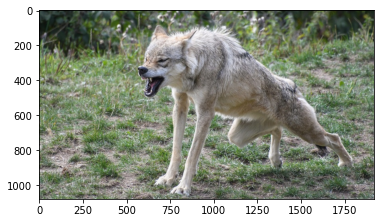

Imagem não é similar 0.060747184
Imagem não é similar 0.17616636
Imagem não é similar 0.15773672
Imagem não é similar 0.12230334
Imagem não é similar 0.11653151
Recomendamos para Você ...  0.3621148


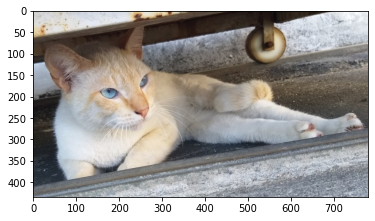

Imagem não é similar 0.10814315
Imagem não é similar 0.0013175674
Imagem não é similar 0.0041711964
Imagem não é similar 0.00023027026
Imagem não é similar 0.17702614
Imagem não é similar 0.019806562
Imagem não é similar 0.23703781
Imagem não é similar 0.14906475
Imagem não é similar 0.009990066
Imagem não é similar 0.030532718
Imagem não é similar 0.1180025
Imagem não é similar 0.21803002
Imagem não é similar 0.058566548
Imagem não é similar 0.15852787
Imagem não é similar 0.14687121
Imagem não é similar 0.021365337
Imagem não é similar 0.033319503
Imagem não é similar 0.14984277
Imagem não é similar 0.0042163255
Imagem não é similar 0.0675091


AttributeError: ignored

In [54]:
########################################## INTERFACE DO USÚARIO ##########################################
peso_similaridade = float(input("Informe o peso de similaridade: "))
img1 = files.upload()  #UPLOAD DA IMAGEM

#SUBINDO A IMAGEM PARA A RAIZ DO DRIVE
if (len(list(img1.keys())) > 1):
  print('Subindo a imagem para o drive')
  sys.exit()

#LENDO IMAGEM QUE SUBIU NO DRIVE
image_name = list(img1.keys())[0]
image_1 = cv2.imread(image_name)  ##imagem do drive

#%degub


#################################################### 2 imagem ###################################################
#ACESSANDO A PASTA COM AS IMAGENS
path = '/content/Imagem/'
os.chdir(path)
pacote_img = !ls

i=0
while i <= len(pacote_img):  
  nome = pacote_img[i] #nome da imagem na posição 0

  nome1 = nome[1:] #retorna o texto a partir da posição 1
  caminho = '/content/Imagem/' #caminho da lista de fotos
  nomecompleto = caminho+nome1
  image_2 = cv2.imread(caminho+nome1) #Carregando a 2 imagem
  i+=1


 ################################################### Redimensionar Image m ###################################################
  #pesquisar como deixar duas imagem do mesmo tamanho para calcular

  height = image_1.shape[0] #altura
  width = image_2.shape[1] #largura

  if(image_1.shape[0] > image_2.shape[0]):
    height = image_2.shape[0]

  if(image_1.shape[1]> image_2.shape[1]):
    width = image_2.shape[1]

  dimensions= (width, height)

  ################################################### Calculando o Histograma ###################################################
  hist_img1 = cv2.calcHist([image_1], [0,1], None, [180,256], [0,180,0,256])
  hist_img1  = cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);

  hist_img2 = cv2.calcHist([image_2], [0,1], None, [180,256], [0,180,0,256])
  hist_img2  = cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);


  ################################################### Transformar Histograma em um vetor de n dimensões #############  
  hist_img1 = np.concatenate(hist_img1)
  hist_img1 = hist_img1.reshape(1,-1)  

  hist_img2 = np.concatenate(hist_img2)
  hist_img2 = hist_img2.reshape(1,-1)


 ###################################################VERIFICA PESO DE SIMILARIDADE ################################################### 
  coef_similaridade = cosine_similarity(hist_img1,hist_img2)[0][0]
  valor_similar = peso_similaridade/100

  if (valor_similar <= coef_similaridade):  
    print("Recomendamos para Você ... ",coef_similaridade)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.show() 
  else:
    print('Imagem não é similar', coef_similaridade)




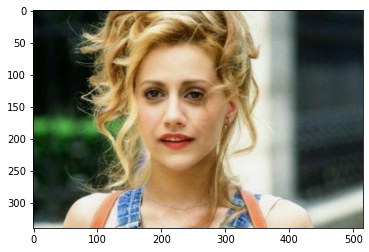

In [55]:
### Teste para acessar uma imagem da pasta

#ACESSANDO A PASTA COM AS IMAGENS
path = '/content/drive/My Drive/Colab Notebooks/Máquina de Busca/Imagem'
os.chdir(path)
pacote_img = !ls
num= len(pacote_img)

i=0
while i <= 5: #restrição de 5 imagens
  nome = pacote_img[i] #nome da imagem na posição 0
  nome1 = nome[1:] #retorna o texto a partir da posição 1
  i+=1
  caminho = '/content/drive/My Drive/Colab Notebooks/Máquina de Busca/Imagem/' #caminho da lista de fotos
  foto =caminho+nome1
  image_2 = cv2.imread(foto) #Carregando a 2 imagem
  
  plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
  plt.show